# Generate Time Series
## This is a simple tutorial to get you generating time series data


This Notebook describes how you might generate some dummy time series data. Sometimes we don't have data available to us, in this case it's useful to be able to generate time series data that will resemble our actual data. Generating data can be useful for trying out various anomaly detection or forecasting algorithms. 

In this specific example we will generate a collection of similar time series. We will engineer one series to be anomalous by giving our "outlier" series greater standardard deviation than the rest of the series. By engineering anomalies, we have an opportunity to test out various anomaly detection algorithms. We use Timesynth to generate this data. 

[Timesynth](https://github.com/TimeSynth/TimeSynth?files=1) is "a Multipurpose Library for Synthetic Time Series in Python. TimeSynth is an open source library for generating synthetic time series for model testing. The library can generate regular and irregular time series. The architecture allows the user to match different signals with different architectures allowing a vast array of signals to be generated." 


### STEP ONE: import dependencies 

In [8]:
import pandas as pd
import datetime
import timesynth as ts

### STEP Two: Generate multiple time series data with an anomaly 
This function takes n as an input of the number of time series you want to geneerate. It also automatically generates one series that is an outlier. 

In [24]:
def gen_time_series(n,start,stop,periods,outlier=True):
    time_series = pd.DataFrame([])
    time_sampler = ts.TimeSampler(stop_time=20)
    # Sampling irregular time samples
    irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)
    # Initializing Sinusoidal signal
    sinusoid = ts.signals.Sinusoidal(frequency=0.25)
    # Initializing Gaussian noise
    white_noise = ts.noise.GaussianNoise(std=0.5)
    timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
    if outlier == True:
        outlier_samples, outlier_signals, outlier_errors = timeseries.sample(irregular_time_samples)
        time_series["outlier"] = outlier_samples
    for i in range(n):
        # Initializing Gaussian noise
        white_noise = ts.noise.GaussianNoise(std=0.3)
        # Initializing TimeSeries class with the signal
        timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
        samples, signals, errors = timeseries.sample(irregular_time_samples) 
        time_series[str(i)] = samples
    
    t = pd.date_range(start,stop,periods)
    s = pd.Series(t, name = 'TimeStamp')
    time_series.insert(0, 'TimeStamp', s)
    time_series.set_index('TimeStamp')
    return time_series

In [23]:
generated_ts_df = gen_time_series(10,start='1/1/2020',stop='05/01/2020',periods=250)
generated_ts_df.head()

,TimeStamp,outlier,0,1,2,3,4,5,6,7,8,9
0,2020-01-01 00:00:00.000000000,0.273569,0.089068,0.043086,-0.086636,0.027345,-0.167815,-0.294905,0.253433,-0.433363,-0.240902,0.360191
1,2020-01-01 11:39:45.542168674,0.400582,0.610508,0.553688,0.229399,0.338252,0.075233,0.618103,0.304662,0.500785,0.536381,0.099216
2,2020-01-01 23:19:31.084337349,0.316921,0.132003,0.489828,0.560843,1.041315,1.105678,0.738242,0.616640,0.054625,-0.038528,0.028781
3,2020-01-02 10:59:16.626506024,-0.210285,0.825345,0.992569,0.980352,0.855107,1.251779,1.004523,0.555303,0.711491,0.837791,0.508232
4,2020-01-02 22:39:02.168674698,0.685683,0.329103,0.675492,1.221045,0.881072,1.285694,0.724484,0.660852,0.526731,0.931796,0.576716


Now we want to add a timestamp index to our dataframe. First, we look at the lenght of the our dataframe to create an array of timestamps to match. 

In [28]:
len(generated_ts_df)

250

Now we create that array with the appropriate amount of periods, and we insert the array, ```s``` as a column

In [29]:
t = pd.date_range(start='1/1/2020', end='05/01/2020', periods=250)
s = pd.Series(t, name = 'TimeStamp')
generated_ts_df.insert(0, 'TimeStamp', s)
generated_ts_df.head()

,TimeStamp,outlier,0,1,2,3,4,5,6,7,8,9
0,2020-01-01 00:00:00.000000000,0.231026,0.440639,-0.167604,-0.149081,-0.218442,-0.428316,-0.242047,-0.137425,-0.171636,-0.124152,0.170380
1,2020-01-01 11:39:45.542168576,-0.729871,-0.423899,0.291906,0.449500,0.508535,0.042391,0.193509,-0.261094,0.220839,0.475324,0.427169
2,2020-01-01 23:19:31.084337408,1.141963,0.677127,0.570914,0.623382,0.878105,0.660618,-0.013742,0.369268,0.859399,0.695049,0.352337
3,2020-01-02 10:59:16.626505984,0.697885,0.708954,0.263466,0.531120,0.336590,0.431860,0.809973,0.577472,1.129735,0.501844,0.038249
4,2020-01-02 22:39:02.168674816,1.627959,0.225522,0.740908,0.504309,0.028197,0.447967,0.565526,0.885857,0.142467,0.529941,0.691398


Now we can set our timestamp column as an index

In [30]:
generated_ts_df = generated_ts_df.set_index('TimeStamp')
generated_ts_df.head()

,outlier,0,1,2,3,4,5,6,7,8,9
TimeStamp,,,,,,,,,,,
2020-01-01 00:00:00.000000000,0.231026,0.440639,-0.167604,-0.149081,-0.218442,-0.428316,-0.242047,-0.137425,-0.171636,-0.124152,0.170380
2020-01-01 11:39:45.542168576,-0.729871,-0.423899,0.291906,0.449500,0.508535,0.042391,0.193509,-0.261094,0.220839,0.475324,0.427169
2020-01-01 23:19:31.084337408,1.141963,0.677127,0.570914,0.623382,0.878105,0.660618,-0.013742,0.369268,0.859399,0.695049,0.352337
2020-01-02 10:59:16.626505984,0.697885,0.708954,0.263466,0.531120,0.336590,0.431860,0.809973,0.577472,1.129735,0.501844,0.038249
2020-01-02 22:39:02.168674816,1.627959,0.225522,0.740908,0.504309,0.028197,0.447967,0.565526,0.885857,0.142467,0.529941,0.691398


Plotting our time series allows us to determine whether or not our generated time series will be a good fit for our anomaly detection exploration. Here we see that the series are behaving similarly, it's not immediatlly apparent through visual inspection which time series has the engineered anomaly. This Time series is used in the python implementation of mad(). 

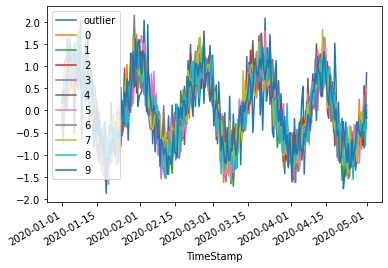

In [31]:
generated_ts_df.plot()

In [34]:
generated_ts_df.to_csv("timeseries_anomaly.csv",index=True)